Fourier Transform is a mathematical method to analyze frequency components in one dimensional signal, such as sound or radio wave. 

### What is 2-D Fourier Transform
This is a type of Fourier Transform which takes 2-dimensional data (2-D numpy array) as input, and returns another 2-dimensional data. We usually use this 2-D Fourier Transform on images.
Here is an example of applying Fourier Transform on a gray scale image. Each element of the output is a complex number. So we usually take the absolute values of the output such that it can be displayed as an image.
There is also the inverse of Fourier Transform (IFT), which takes a frequency domain image as input and then restores the original image. We can make use of this inverse transform to apply some interesting techniques on images, such as Low Pass Filter or motion estimation of camera.

### Interpreting the frequency domain image
You can see that the result image of the example above has brightest pixels (larger values) at the center and outer size pixels relatively less bright (smaller values).
<img src="freq_domain.png" width=800 height=790>
The output frequency domain image tells us how much each frequency component is included in the original image. Pixels near the center represent lower frequency components, and outer side pixels represent higher frequency component. Thus, if pixels near the center are brighter than others outer side, this means that the original image is composed with lower frequency components more than higher frequency components.
Here, a lower frequency component of an image appears in the original image as rough shape of large objects. Conversely, a higher frequency component can add some details into the image, such as the texture of the ground in the example image above. Remember that small objects and edges of objects are mainly made of higher frequencies.

### Fourier Transform of Image using opencv
 “dft” means “discrete fourier transform”, since an image is a collection discrete values, not continuous ones.
 

## 4.6.5 Fourier Spectrum and Phase Angle
Digital images, unlike light wave and sound wave in real life, are discrete because pixels are not continuous. That means we should implement Discrete Fourier Transformation (DFT) instead of Fourier Transformation. However, DFT process is often too slow to be practical. That is the reason why Fast Fourier Transformation (FFT) is efficient for doing the digital image processing.

The result from FFT process is a complex number array which is very difficult to visualize directly. Therefore, we have to transform it into 2-dimension space. Here are two ways that we can visualize this FFT result:

1. Spectrum 

2. Phase angle.

The white area in the spectrum image show the high power of frequency. The corners in the spectrum image represent low frequencies. Therefore, combining two points above, the white area on the corner indicates that there is high energy in low/zero frequencies which is a very normal situation for most images.

Step 2: Shift the zero-frequency component to the center of the spectrum.
2-D FFT has translation and rotation properties, so we can shift frequency without losing any piece of information. I shifted the zero-frequency component to the center of the spectrum which makes the spectrum image more visible for human. Moreover, this translation could help us implement high/low-pass filter easily.

Step 3: Inverse of Step 2. Shift the zero-frequency component back to original location

Step 4: Inverse of Step 1. Compute the 2-dimensional inverse Fast Fourier Transform.
The processes of step 3 and step 4 are converting the information from spectrum back to gray scale image. It could be done by applying inverse shifting and inverse FFT operation.

## Low-pass filter
A low-pass filter is a technique used in computer vision to get a blurred image, or to store an image with less space.
A low-pass filter can be applied only on the Fourier Transform of an image (frequency-domain image), rather than the original image (spacial-domain image). After applying low-pass filter on it, then the filtered frequency-domain image is restored into pixel image, which is a blurred version of the original image.

## fftshift
<img src="fft.png">
 np.fft.fftshift() function does is to just divide an image into four small images, and then rearrange them such that it becomes symmetric about the center.

If we apply fftshift() against a shifted image, then the original image is restored.
If we do not apply shifting, the transformed image looks like the following.


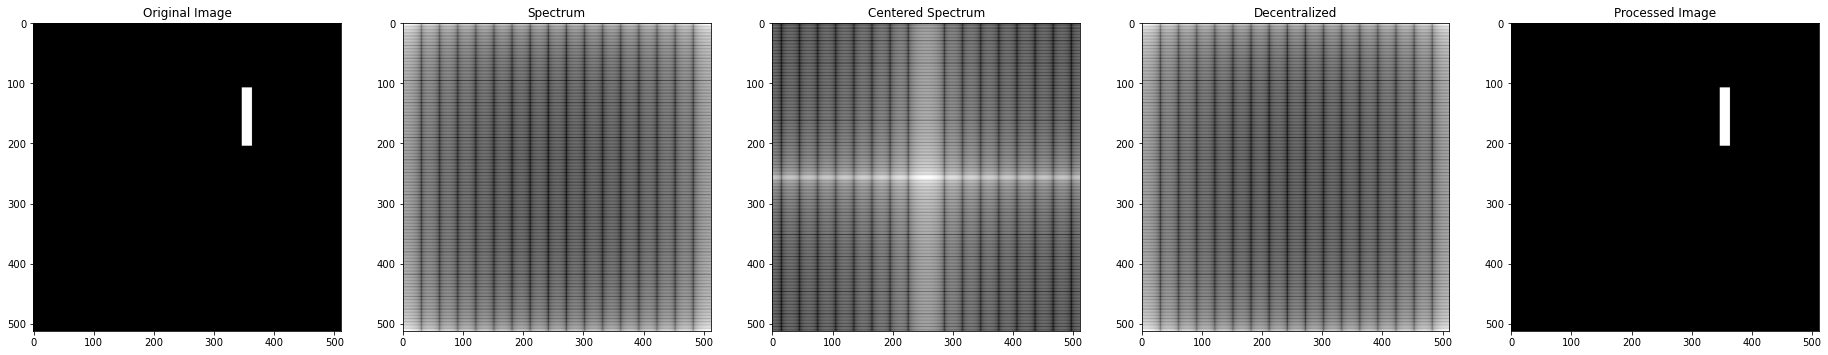

In [28]:
import cv2
import numpy as np
from numpy import sqrt, exp
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread('DIP3E_Original_Images_CH04/Fig0425(a)(translated_rectangle).tif', 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()

### Low Pass filter
Low pass filter is a filter that only allow low frequencies to pass through. Low frequencies in images mean pixel values that are changing slowly. For example, smooth area with slightly color changing in the image such as the center of new blank white paper is considered as a low frequency content.
Since the output of low pass filter only allow low frequencies to pass through, the high frequencies contents such as noises are blocked which make processed image has less noisy pixels. Therefore, low pass filter is highly used to remove the noises in images.

### High Pass filter
On the contrary, is a filter that only allow high frequencies to pass through. High frequencies in images mean pixel values that are changing dramatically. For example, Edge areas in the image with huge color changing such as the edge between two overlap white and black paper is consider as the high frequency content.
The output from high pass filter captures the edges in image which could be used to sharpen the original image with proper overlap calculation. This will enhance sharpness in original image making edges more clear.
From Figure(e)(5) and Figure(f)(5), we could notice that these two filters present different characteristics. Low pass filter tends to preserve overall information in an image. On the other hand, high pass filter is trying to identify changes in an image.


Ideal Filter
<img src="both.png">
Figure (g): (from left to right) (1) Low pass filter with D₀=50 (2) High pass filter with D₀=50
<img src="ilpf.png">
Formula (a): Formula for ideal low pass filter where D₀ is a positive constant and D(u, v) is the distance between a point (u, v) in the frequency domain and the center of the frequency rectangle
The idea which behinds ideal filter is very simple: Given a radius value D₀ as a threshold, low pass filter Figure (g)(1) has H(u, v) equals to 1 under the threshold, and H(u, v) equals to 0 when above the threshold.
<img src="ihpf.png">
Formula (b): Formula for ideal high pass filter where D₀ is a positive constant and D(u, v) is the distance between a point (u, v) in the frequency domain and the center of the frequency rectangle
On the contrary, high pass filter Figure (g)(2) has H(u, v) equals to 0 under threshold, and H(u, v) equals to 1 when above the threshold.


In [20]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

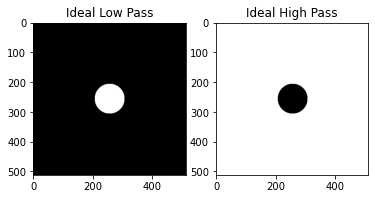

In [31]:
new_img1=idealFilterLP(50, img_c1.shape)
plt.subplot(121)
plt.title("Ideal Low Pass")
plt.imshow(new_img1, cmap="gray")
new_img2=idealFilterHP(50, img_c1.shape)
plt.subplot(122)
plt.title("Ideal High Pass")
plt.imshow(new_img2, cmap="gray")

### Butterworth Filter

<img src="blpf.png">
Formula (c): Formula for Butterworth low pass filter where D₀ is a positive constant and D(u, v) is the distance between a point (u, v) in the frequency domain and the center of the frequency rectangle
Unlike an ideal filter, a Butterworth filter does not have a sharp discontinuity that gives a clear cutoff between passed and filtered frequencies. Butterworth filter introduces a new parameter n in the function. While manipulating n, it affects the clearness of the cutoff between passed and filtered frequencies. Figure(h) and Figure(i)

<img src="bhpf.png">
Formula (d): Formula for Butterworth high pass filter where D₀ is a positive constant and D(u, v) is the distance between a point (u, v) in the frequency domain and the center of the frequency rectangle


In [17]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

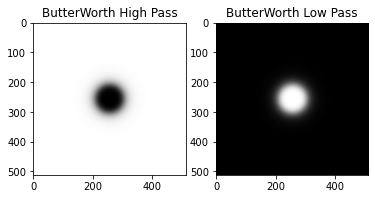

In [32]:
new_img1=butterworthHP(50, img_c1.shape,3)
plt.subplot(121)
plt.title("ButterWorth High Pass")
plt.imshow(new_img1, cmap="gray")
new_img2=butterworthLP(50, img_c1.shape, 3)
plt.subplot(122)
plt.title("ButterWorth Low Pass")
plt.imshow(new_img2, cmap="gray")

## Gaussian Filter
<img src="ghpf.png">
Formula (e): Formula for Gaussian low pass filter where D₀ is a positive constant and D(u, v) is the distance between a point (u, v) in the frequency domain and the center of the frequency rectangle
Gaussian filter is a smoother cutoff version than Butterworth. The cutoff between passed and filtered frequencies is very blurry which leads to smoother processed images.
<img src="glpf.png">
Formula (f): Formula for Gaussian high pass filter where D₀ is a positive constant and D(u, v) is the distance between a point (u, v) in the frequency domain and the center of the frequency rectangle



In [29]:

def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

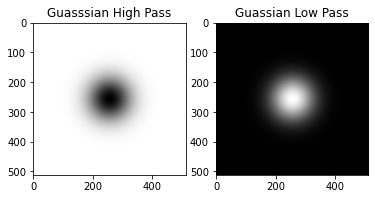

In [33]:
new_img1=gaussianHP(50, img_c1.shape)
plt.subplot(121)
plt.title("Guasssian High Pass")
plt.imshow(new_img1, cmap="gray")
new_img2=gaussianLP(50, img_c1.shape)
plt.subplot(122)
plt.title("Guassian Low Pass")
plt.imshow(new_img2, cmap="gray")

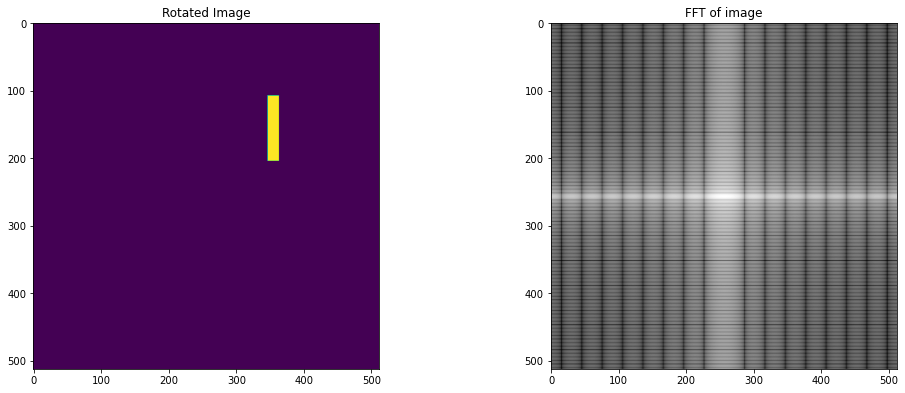

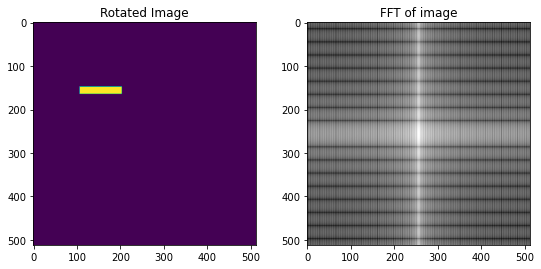

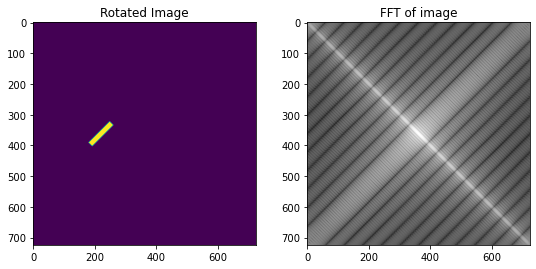

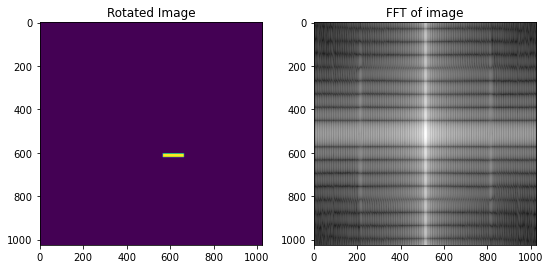

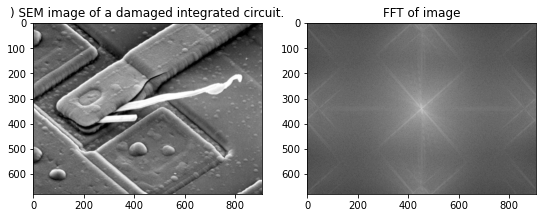

In [38]:
import cv2 as cv
#Generate a 2D sine wave image
x = np.arange(256)  # generate values from 0 to 255 (our image size)
y = np.sin(2 * np.pi * x / 3)  #calculate sine of x values
#Divide by a smaller number above to increase the frequency.
y += max(y) # offset sine wave by the max value to go out of negative range of sine 

#Generate a 256x256 image (2D array of the sine wave)
img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8) # create 2-D array of sine-wave

  #Rotate img by 90 degrees

img = cv2.imread('DIP3E_Original_Images_CH04/Fig0425(a)(translated_rectangle).tif', 0) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Shift DFT. First check the output without the shift
#Without shifting the data would be centered around origin at the top left
#Shifting it moves the origin to the center of the image. 
dft_shift = np.fft.fftshift(dft)

#Calculate magnitude spectrum from the DFT (Real part and imaginary part)
#Added 1 as we may see 0 values and log of 0 is indeterminate
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)


#As the spatial frequency increases (bars closer), 
#the peaks in the DFT amplitude spectrum move farther away from the origin

#Center represents low frequency and the corners high frequency (with DFT shift).
#To build high pass filter block center corresponding to low frequencies and let
#high frequencies go through. This is nothing but an edge filter. 

fig =plt.figure(figsize=(3.4*5, 2.8*5), constrained_layout=False)
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')

img = np.rot90(img) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')


from scipy.ndimage import rotate
img=rotate(img, angle=45)
#img = np.rot90(img) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')


img=rotate(img, angle=45+90)
#img = np.rot90(img) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')


img=cv.imread("DIP3E_Original_Images_CH04/Fig0429(a)(blown_ic).tif",0)
#img = np.rot90(img)
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text(') SEM image of a damaged integrated circuit.')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')



plt.show()

<ipython-input-39-e12898c7ad78>:21: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


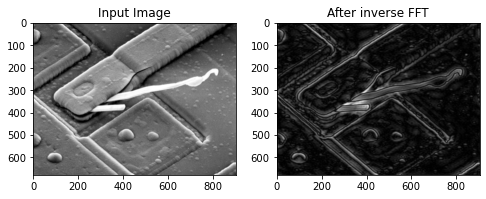

In [39]:
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)

r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1



# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax4 = fig.add_subplot(2,2,2)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


<ipython-input-40-e2011d0494fd>:25: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


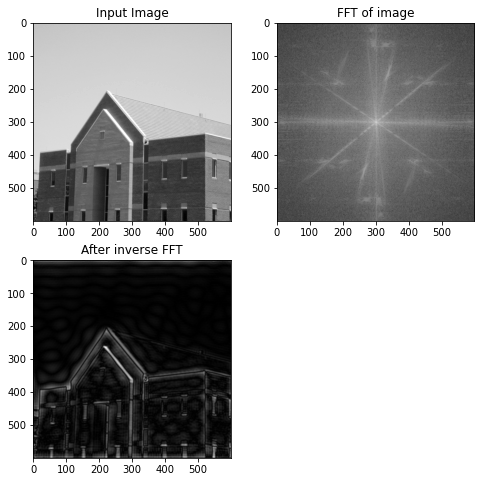

In [40]:
img = cv.imread('DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif',0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)

r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1



# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')
ax4 = fig.add_subplot(2,2,3)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


<ipython-input-42-aa848af9e35d>:21: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


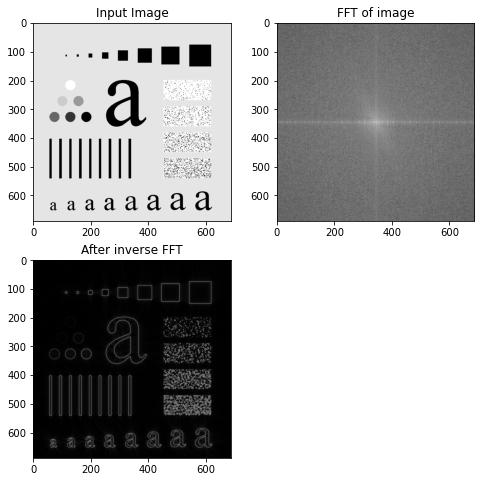

In [42]:
img = cv.imread('DIP3E_Original_Images_CH04/Fig0441(a)(characters_test_pattern).tif',0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')
ax4 = fig.add_subplot(2,2,3)
ax4.imshow(img_back, cmap="gray")
ax4.title.set_text('After inverse FFT')
plt.show()


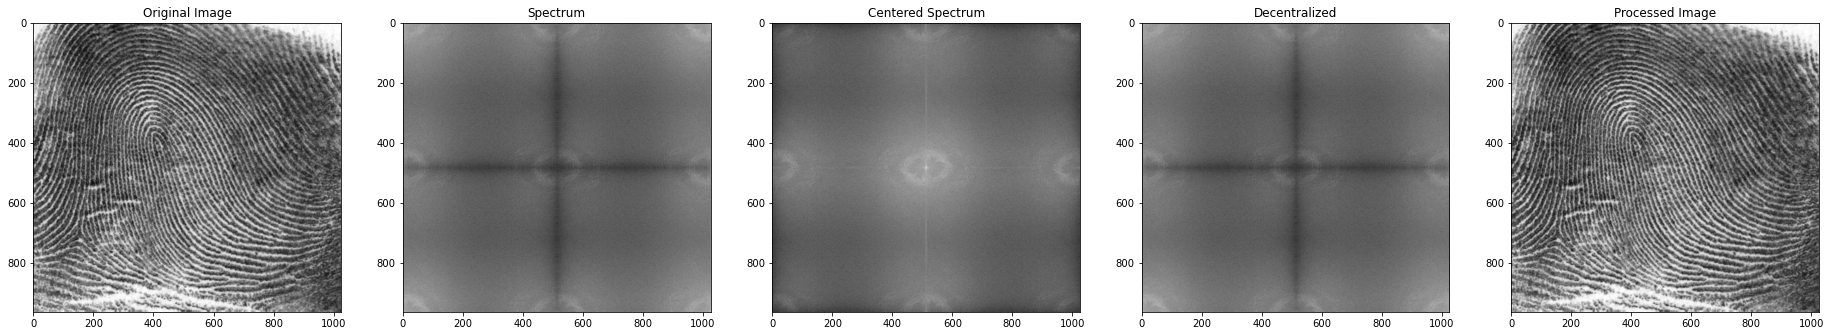

In [43]:
import cv2
import numpy as np
from numpy import sqrt, exp
import matplotlib.pyplot as plt

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c1 = cv2.imread('DIP3E_Original_Images_CH04/Fig0457(a)(thumb_print).tif', 0)
img_c2 = np.fft.fft2(img_c1)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

plt.show()